In [1]:
import tensorflow as tf
import splitfolders
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [10]:
#return augmented list
def preprocess_data(image_path, label):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (512, 512))
    
    datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
    )
    
    augmented_images = []
    
    # Include the original image
    augmented_images.append((img, 'Original Image'))
    
    for i in range (0,5):
        params = datagen.get_random_transform(img.shape)
        augmented_img = datagen.apply_transform(img, params)
        augmented_img = np.clip(augmented_img, 0, 255).astype(np.uint8)
        
        augmented_images.append((augmented_img, 'Augmented Image'))
        
    return augmented_images


#show augmented list
def show_images(images):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))

    for i, (img, label) in enumerate(images):
        axes[i].imshow(img)
        axes[i].set_title(f'{label}')
        axes[i].axis('off')

    plt.show()





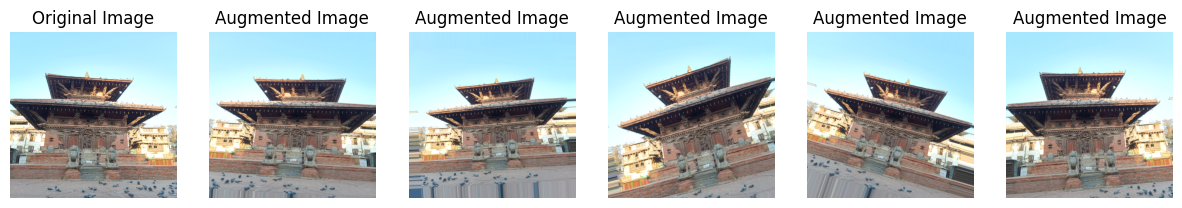

In [11]:
#Augmenting a single image
augmented_images = [preprocess_data('Dataset\Chaar Narayan Temple\East\IMG_20231224_080035.jpg', 1.1)]
# Display augmented images from the directory
for images in augmented_images:
    show_images(images)

In [3]:
#save augmented images in folder
def augment_data(image_path, save_dir):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (512, 512))
    
    datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
    )
    
    for i in range (0,6):
        if i==0:
            augmented_img = img 
        else:
            params = datagen.get_random_transform(img.shape)
            augmented_img = datagen.apply_transform(img, params)
            augmented_img = np.clip(augmented_img, 0, 255).astype(np.uint8)
        save_path = os.path.join(save_dir, f"augmented_{i}_{os.path.basename(image_path)}")
        cv2.imwrite(save_path, cv2.cvtColor(augmented_img, cv2.COLOR_RGB2BGR))

In [ ]:
#Augmenting a directory
augmented_images = [augment_data(os.path.join('Aayush\Chaar Narayan Temple\East', img), 'Aayush\Chaar Narayan Temple\East') for img in os.listdir('Aayush\Chaar Narayan Temple\East')]

In [ ]:
augmented_images = [augment_data(os.path.join('Aayush\Chaar Narayan Temple\West', img), 'Aayush\Chaar Narayan Temple\West') for img in os.listdir('Aayush\Chaar Narayan Temple\West')]

In [ ]:
augmented_images = [augment_data(os.path.join('Aayush\Chaar Narayan Temple\South', img), 'Aayush\Chaar Narayan Temple\South') for img in os.listdir('Aayush\Chaar Narayan Temple\South')]


In [ ]:
augmented_images = [augment_data(os.path.join('Aayush\Chaar Narayan Temple\\North', img), 'Aayush\Chaar Narayan Temple\\North') for img in os.listdir('Aayush\Chaar Narayan Temple\\North')]


In [7]:
names = ['Chaar Narayan Temple', 'Chyasin Dega','Krishna Mandir', 'Shree Bhimsen Temple', 'Vishwanath Temple']
sides = ['East','West','North','South']
directory = 'Dataset'
save_directory = 'Augmented Dataset'
for name in names:
    augmented_base_dir = os.path.join(save_directory,name)
    os.makedirs(augmented_base_dir, exist_ok=True)
    for side in sides:
        os.makedirs(os.path.join(augmented_base_dir,side), exist_ok=True)
        path=os.path.join(directory,name,side)
        save_path=os.path.join(save_directory,name,side)
        [augment_data(os.path.join(path,img),save_path) for img in os.listdir(path)]
